<a href="https://colab.research.google.com/github/TagoreT/Coding-Assignment/blob/main/deepseek-house_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install gradio xgboost shap catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.7/57.7 MB 11.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 321.9/321.9 kB 17.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.8/94.8 kB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 79.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.5/71.5 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.3/62.3 kB 4.8 MB/s eta 0:00:00
  Attempting uninstall: markupsafe
    Found existing installation: MarkupSafe 3.0.2
    Uninstalling MarkupSafe-3.0.2:
      Successfully uninstalled MarkupSafe-3.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torch 2.5.1+cu124 requires nvidia-cublas-cu12==12.4.5.8; platform_system == "Linux" and platform_machine =

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import gradio as gr

In [ ]:
url = "https://github.com/itsmayurmore/Indian-House-Price-Prediction/raw/master/Model/Indian%20House%20Prices.csv"
data = pd.read_csv(url)
data.head(5)
# data.info()

,Unnamed: 0,Price,Area,Location,No. of Bedrooms,Resale,MaintenanceStaff,Gymnasium,SwimmingPool,LandscapedGardens,...,Microwave,GolfCourse,TV,DiningTable,Sofa,Wardrobe,Refrigerator,City,Latitude,Longitude
0,0,300.00,3340,JP Nagar Phase 1,4.0,0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Banglore,12.265594,76.646540
1,1,83.58,1675,Doddanekundi,3.0,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Banglore,12.971319,77.696477
2,2,68.45,1670,Kengeri,3.0,0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Banglore,12.917657,77.483757
3,3,67.97,1220,Horamavu,2.0,0,0.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Banglore,13.027331,77.660151
4,4,200.00,2502,Thanisandra,4.0,0,0.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Banglore,13.054713,77.633926


In [ ]:
selected_columns = ['Price', 'Area', 'Location', 'No. of Bedrooms',
                    'Gymnasium', 'SwimmingPool', 'LandscapedGardens',
                    'JoggingTrack', 'City']

# Keeping only the selected columns
data = data[selected_columns]
data = pd.get_dummies(data, drop_first=True)

In [ ]:
X = data.drop(columns=['Price'], errors='ignore')
y = data['Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
rf = RandomForestRegressor(random_state=42, n_estimators=100)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
print("Random Forest - Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print("Random Forest - Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("Random Forest - R² Score:", r2_score(y_test, y_pred))

Random Forest - Mean Absolute Error: 18.737700216131994
Random Forest - Mean Squared Error: 5577.061970101774
Random Forest - R² Score: 0.7155191306547348


In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

# Train Gradient Boosting model
gbr = GradientBoostingRegressor(n_estimators=200, learning_rate=0.1, max_depth=5, random_state=42)
gbr.fit(X_train, y_train)

# Evaluate Gradient Boosting model
y_pred_gbr = gbr.predict(X_test)
print("Gradient Boosting - R² Score:", r2_score(y_test, y_pred_gbr))


Gradient Boosting - R² Score: 0.701147743202045


In [ ]:
# Gradient Boosting (XGBoost)
from xgboost import XGBRegressor

xgb = XGBRegressor(random_state=42, n_estimators=200, max_depth=10, learning_rate=0.1)
xgb.fit(X_train, y_train)
xgb_pred = xgb.predict(X_test)

# Evaluate XGBoost
print("XGBoost - Mean Absolute Error:", mean_absolute_error(y_test, xgb_pred))
print("XGBoost - Mean Squared Error:", mean_squared_error(y_test, xgb_pred))
print("XGBoost - R² Score:", r2_score(y_test, xgb_pred))

XGBoost - Mean Absolute Error: 20.30138468019983
XGBoost - Mean Squared Error: 5172.293865857501
XGBoost - R² Score: 0.73616598428411


In [ ]:
# Gradient Boosting (CatBoost)
from catboost import CatBoostRegressor

cat = CatBoostRegressor(random_state=42, iterations=200, depth=10, learning_rate=0.1, verbose=0)
cat.fit(X_train, y_train)
cat_pred = cat.predict(X_test)

# Evaluate CatBoost
print("CatBoost - Mean Absolute Error:", mean_absolute_error(y_test, cat_pred))
print("CatBoost - Mean Squared Error:", mean_squared_error(y_test, cat_pred))
print("CatBoost - R² Score:", r2_score(y_test, cat_pred))

CatBoost - Mean Absolute Error: 25.09066493499651
CatBoost - Mean Squared Error: 4584.500945388953
CatBoost - R² Score: 0.7661487676754934


In [ ]:
# Compare all model results
models = {
    "Random Forest": r2_score(y_test, y_pred),
    "XGBoost": r2_score(y_test, xgb_pred),
    "LightGBM": r2_score(y_test, y_pred_gbr),
    "CatBoost": r2_score(y_test, cat_pred)
}

print("Model Comparison:")
for model, score in models.items():
    print(f"{model} R² Score: {score:.4f}")


Model Comparison:
Random Forest R² Score: 0.7155
XGBoost R² Score: 0.7362
LightGBM R² Score: 0.7011
CatBoost R² Score: 0.7661


In [ ]:
from sklearn.model_selection import GridSearchCV
from catboost import CatBoostRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Define the parameter grid
param_grid = {
    'iterations': [100, 200, 300],
    'depth': [6, 10, 12],
    'learning_rate': [0.05, 0.1, 0.2],
    'l2_leaf_reg': [1, 3, 5],
}

# Initialize the CatBoostRegressor
cat_grid = CatBoostRegressor(random_state=42, verbose=0)

# Initialize GridSearchCV with 5-fold cross-validation
grid_search = GridSearchCV(estimator=cat_grid, param_grid=param_grid, cv=5, scoring='neg_mean_absolute_error')

# Fit the model with the training data
grid_search.fit(X_train, y_train)

# Best hyperparameters found
print("GridSearchCV - Best Hyperparameters: ", grid_search.best_params_)

# Get the best model
best_cat_grid = grid_search.best_estimator_

# Make predictions with the best model
cat_pred_grid = best_cat_grid.predict(X_test)

# Evaluate the performance
print("CatBoost - Mean Absolute Error:", mean_absolute_error(y_test, cat_pred_grid))
print("CatBoost - Mean Squared Error:", mean_squared_error(y_test, cat_pred_grid))
print("CatBoost - R² Score:", r2_score(y_test, cat_pred_grid))


GridSearchCV - Best Hyperparameters:  {'depth': 12, 'iterations': 300, 'l2_leaf_reg': 1, 'learning_rate': 0.2}
CatBoost - Mean Absolute Error: 18.64290229163873
CatBoost - Mean Squared Error: 3736.986124667244
CatBoost - R² Score: 0.8093797294748133


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Define the parameter distribution
param_dist = {
    'iterations': np.arange(100, 500, 100),
    'depth': np.arange(6, 16, 2),
    'learning_rate': [0.05, 0.1, 0.2],
    'l2_leaf_reg': [1, 3, 5, 10],
}

# Initialize the CatBoostRegressor
cat_random = CatBoostRegressor(random_state=42, verbose=0)

# Initialize RandomizedSearchCV with 5-fold cross-validation
random_search = RandomizedSearchCV(estimator=cat_random , param_distributions=param_dist, n_iter=10, cv=5, scoring='neg_mean_absolute_error', random_state=42)

# Fit the model with the training data
random_search.fit(X_train, y_train)

# Best hyperparameters found
print("RandomizedSearchCV - Best Hyperparameters: ", random_search.best_params_)

# Get the best model
best_cat_random = random_search.best_estimator_

# Make predictions with the best model
cat_pred_random = best_cat_random.predict(X_test)

# Evaluate the performance
print("CatBoost - Mean Absolute Error:", mean_absolute_error(y_test, cat_pred_random))
print("CatBoost - Mean Squared Error:", mean_squared_error(y_test, cat_pred_random))
print("CatBoost - R² Score:", r2_score(y_test, cat_pred_random))


RandomizedSearchCV - Best Hyperparameters:  {'learning_rate': 0.2, 'l2_leaf_reg': 3, 'iterations': 400, 'depth': 14}
CatBoost - Mean Absolute Error: 18.498245098604247
CatBoost - Mean Squared Error: 3731.300066136642
CatBoost - R² Score: 0.8096697701597841


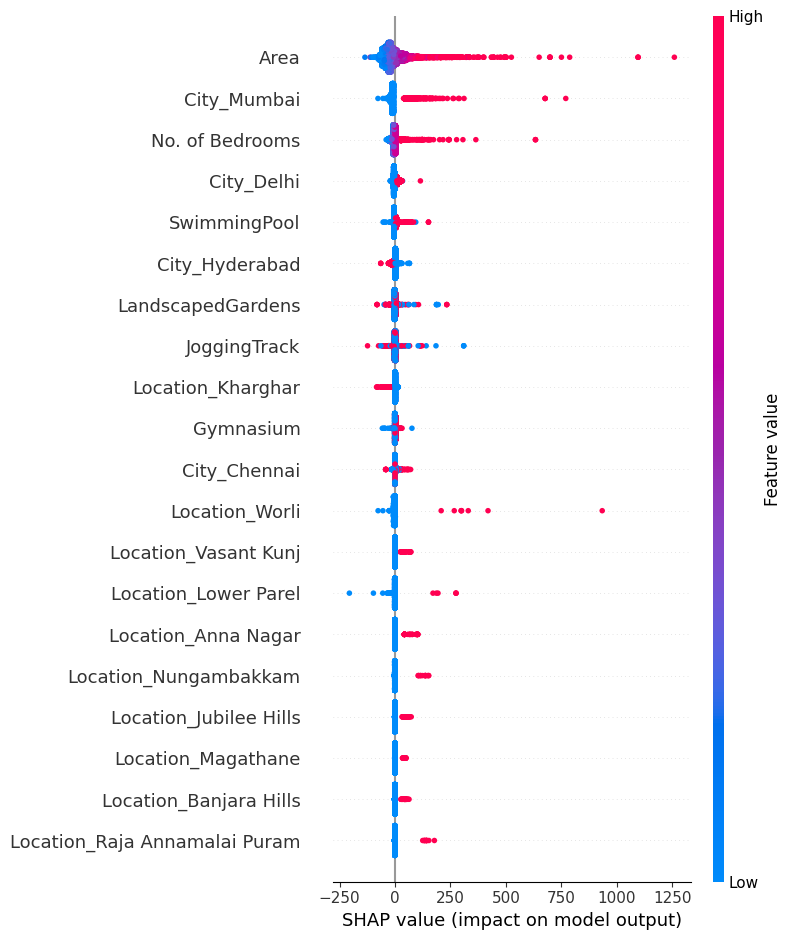

In [ ]:
import shap

# Initialize the explainer
explainer = shap.TreeExplainer(best_cat_grid)  # Use the best CatBoost model from GridSearchCV or RandomizedSearchCV
shap_values = explainer.shap_values(X_train)

# Summary plot for feature importance
shap.summary_plot(shap_values, X_train)

In [ ]:
from sklearn.model_selection import cross_val_score

# Perform 5-fold cross-validation
cv_scores = cross_val_score(best_cat_grid, X_train, y_train, cv=5, scoring='r2')

# Display cross-validation results
print("Cross-Validation R² Scores:", cv_scores)
print("Average R² Score:", cv_scores.mean())

Cross-Validation R² Scores: [0.78613179 0.88837983 0.60849068 0.87290939 0.74540757]
Average R² Score: 0.7802638517045274


In [ ]:
# Feature importance
feature_importances = best_cat_grid.get_feature_importance()
feature_names = X_train.columns

# Display feature importance
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)
print(importance_df)


                         Feature  Importance
0                           Area   33.558253
750                  City_Mumbai   15.321406
5                   JoggingTrack    6.771220
1                No. of Bedrooms    6.050878
4              LandscapedGardens    5.595050
..                           ...         ...
204  Location_Happy Homes Colony    0.000000
205          Location_Hari Nagar    0.000000
208          Location_Hastinapur    0.000000
212              Location_Hennur    0.000000
375      Location_Matrusri Nagar    0.000000

[751 rows x 2 columns]


In [ ]:
from sklearn.ensemble import StackingRegressor

# Define the base models
base_models = [
    ('random_forest', rf),  # Random Forest model
    ('catboost', best_cat_grid)  # Tuned CatBoost model
]

# Stacking regressor
stacked_model = StackingRegressor(estimators=base_models, final_estimator=CatBoostRegressor(iterations=100, random_state=42))
stacked_model.fit(X_train, y_train)

# Predictions and evaluation
stacked_pred = stacked_model.predict(X_test)
print("Stacked Model - R² Score:", r2_score(y_test, stacked_pred))

Learning rate set to 0.366057
0:	learn: 110.4473834	total: 1.69ms	remaining: 167ms
1:	learn: 93.3900479	total: 3.77ms	remaining: 185ms
2:	learn: 84.8261779	total: 6.03ms	remaining: 195ms
3:	learn: 79.6560897	total: 10.1ms	remaining: 242ms
4:	learn: 76.8380222	total: 11.8ms	remaining: 224ms
5:	learn: 75.7262370	total: 13.6ms	remaining: 214ms
6:	learn: 75.1128640	total: 15.6ms	remaining: 207ms
7:	learn: 74.5694370	total: 17.5ms	remaining: 201ms
8:	learn: 74.0090153	total: 19.3ms	remaining: 195ms
9:	learn: 73.9056701	total: 21.5ms	remaining: 193ms
10:	learn: 73.6355546	total: 23.3ms	remaining: 189ms
11:	learn: 73.5740899	total: 25ms	remaining: 183ms
12:	learn: 73.5617486	total: 26.9ms	remaining: 180ms
13:	learn: 73.2021137	total: 28.8ms	remaining: 177ms
14:	learn: 73.1645373	total: 30.7ms	remaining: 174ms
15:	learn: 73.1406141	total: 32.7ms	remaining: 172ms
16:	learn: 73.1322332	total: 34.7ms	remaining: 169ms
17:	learn: 73.0908997	total: 36.6ms	remaining: 167ms
18:	learn: 73.0821171	total

In [ ]:
import gradio as gr

def predict_price(area, bedrooms, bathrooms, stories, mainroad, guestroom, basement, hotwaterheating, airconditioning, parking, prefarea, furnishingstatus):
    input_data = pd.DataFrame({
        'area': [area],
        'bedrooms': [bedrooms],
        'bathrooms': [bathrooms],
        'stories': [stories],
        'mainroad': [mainroad],
        'guestroom': [guestroom],
        'basement': [basement],
        'hotwaterheating': [hotwaterheating],
        'airconditioning': [airconditioning],
        'parking': [parking],
        'prefarea': [prefarea],
        'furnishingstatus': [furnishingstatus]
    })
    input_data = pd.get_dummies(input_data, drop_first=True)
    prediction = best_cat_grid.predict(input_data)
    return prediction[0]

# Create Gradio interface
iface = gr.Interface(
    fn=predict_price,
    inputs=[
        gr.components.Number(label="Area"),
        gr.components.Number(label="Bedrooms"),
        gr.components.Number(label="Bathrooms"),
        gr.components.Number(label="Stories"),
        gr.components.Radio(["Yes", "No"], label="Mainroad"),
        gr.components.Radio(["Yes", "No"], label="Guestroom"),
        gr.components.Radio(["Yes", "No"], label="Basement"),
        gr.components.Radio(["Yes", "No"], label="Hotwaterheating"),
        gr.components.Radio(["Yes", "No"], label="Airconditioning"),
        gr.components.Number(label="Parking"),
        gr.components.Radio(["Yes", "No"], label="Prefarea"),
        gr.components.Radio(["Furnished", "Semi-Furnished", "Unfurnished"], label="Furnishingstatus")
    ],
    outputs="number",
    title="House Price Prediction",
    description="Predict the price of a house based on its features."
)

# Launch the interface
iface.launch()

ModuleNotFoundError: No module named 'gradio'